#IE6400 Foundations Data Analytics Engineering
##Fall Semester 2023
##Group Projects
###Project 1:
####Topic: Cleaning and Analyzing Crime Data


1. Data Acquisition:
* Download the dataset from the provided link and load it into your preferred data analysis tool

In [ ]:
!pip install prophet
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import BallTree
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv('/content/Crime_Data_from_2020_to_Present.csv')
income_df = pd.read_csv('/content/kaggle_income.csv', encoding='ISO-8859-1')

2. Data Inspection:
* Display the first few rows of the dataset.
* Check the data types of each column.
* Review column names and descriptions, if available

In [ ]:
print(df.head())
df.dtypes

       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFEN

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [ ]:
print(income_df.head())

        id  State_Code State_Name State_ab          County            City  \
0  1011000           1    Alabama       AL   Mobile County       Chickasaw   
1  1011010           1    Alabama       AL  Barbour County      Louisville   
2  1011020           1    Alabama       AL   Shelby County      Columbiana   
3  1011030           1    Alabama       AL   Mobile County         Satsuma   
4  1011040           1    Alabama       AL   Mobile County  Dauphin Island   

             Place  Type Primary  Zip_Code Area_Code     ALand     AWater  \
0   Chickasaw city  City   place     36611       251  10894952     909156   
1        Clio city  City   place     36048       334  26070325      23254   
2  Columbiana city  City   place     35051       205  44835274     261034   
3      Creola city  City   place     36572       251  36878729    2374530   
4   Dauphin Island  Town   place     36528       251  16204185  413605152   

         Lat        Lon   Mean  Median  Stdev        sum_w  
0  30.7

In [ ]:
print("Column names and Descriptions")
for column in df.columns:
  print(column, df[column].describe())

Column names and Descriptions
DR_NO count    8.158820e+05
mean     2.160434e+08
std      1.080151e+07
min      8.170000e+02
25%      2.101222e+08
50%      2.201145e+08
75%      2.219155e+08
max      2.399165e+08
Name: DR_NO, dtype: float64
Date Rptd count                     815882
unique                      1378
top       02/03/2023 12:00:00 AM
freq                         924
Name: Date Rptd, dtype: object
DATE OCC count                     815882
unique                      1378
top       12/02/2022 12:00:00 AM
freq                        1130
Name: DATE OCC, dtype: object
TIME OCC count    815882.000000
mean       1335.614658
std         654.102822
min           1.000000
25%         900.000000
50%        1415.000000
75%        1900.000000
max        2359.000000
Name: TIME OCC, dtype: float64
AREA count    815882.000000
mean         10.711521
std           6.092813
min           1.000000
25%           6.000000
50%          11.000000
75%          16.000000
max          21.000000
Nam

3. Data Cleaning:
* Identify and handle missing data appropriately.
* Check for and remove duplicate rows.
* Convert data types if needed (e.g., dates to date format, numerical values to
appropriate numeric types).
* Deal with outliers if relevant to your analysis.
* Standardize or normalize numerical data as necessary.
* Encode categorical data if present.


In [ ]:
print(df.isnull())

missing_data = df.isnull().sum()
percent_missing = (df.isnull().sum() / df.shape[0] * 100)

mis_val_table = pd.DataFrame({'Missing Values': missing_data, '% of Total Values': percent_missing})
print(mis_val_table)

        DR_NO  Date Rptd  DATE OCC  TIME OCC   AREA  AREA NAME  Rpt Dist No  \
0       False      False     False     False  False      False        False   
1       False      False     False     False  False      False        False   
2       False      False     False     False  False      False        False   
3       False      False     False     False  False      False        False   
4       False      False     False     False  False      False        False   
...       ...        ...       ...       ...    ...        ...          ...   
815877  False      False     False     False  False      False        False   
815878  False      False     False     False  False      False        False   
815879  False      False     False     False  False      False        False   
815880  False      False     False     False  False      False        False   
815881  False      False     False     False  False      False        False   

        Part 1-2  Crm Cd  Crm Cd Desc  ...  Status 

In [ ]:
#Drop columns with very high percentage of missing values
df = df.drop(columns=['Crm Cd 4', 'Crm Cd 3', 'Crm Cd 2'])

#Fill categorical columns with 'Unknown' or mode
categorical_columns = ['Weapon Desc', 'Vict Sex', 'Vict Descent', 'Premis Desc']
for col in categorical_columns:
    mode_value = df[col].mode()[0]
    df[col].fillna('Unknown', inplace=True)

#Fill numerical columns with median
numerical_columns = ['Weapon Used Cd', 'Premis Cd', 'Crm Cd 1']
for col in numerical_columns:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

#For 'Cross Street' and 'Mocodes', we fill with 'Unknown' since they are categorical
df['Cross Street'].fillna('Unknown', inplace=True)
df['Mocodes'].fillna('Unknown', inplace=True)

missing_data_after = df.isnull().sum()
missing_columns_after = missing_data_after[missing_data_after > 0]

missing_columns_after

Series([], dtype: int64)

In [ ]:
missing_data = df.isnull().sum()
percent_missing = (df.isnull().sum() / df.shape[0] * 100)

mis_val_table = pd.DataFrame({'Missing Values': missing_data, '% of Total Values': percent_missing})
print(mis_val_table)

                Missing Values  % of Total Values
DR_NO                        0                0.0
Date Rptd                    0                0.0
DATE OCC                     0                0.0
TIME OCC                     0                0.0
AREA                         0                0.0
AREA NAME                    0                0.0
Rpt Dist No                  0                0.0
Part 1-2                     0                0.0
Crm Cd                       0                0.0
Crm Cd Desc                  0                0.0
Mocodes                      0                0.0
Vict Age                     0                0.0
Vict Sex                     0                0.0
Vict Descent                 0                0.0
Premis Cd                    0                0.0
Premis Desc                  0                0.0
Weapon Used Cd               0                0.0
Weapon Desc                  0                0.0
Status                       0                0.0


In [ ]:
duplicate_rows = df[df.duplicated()]

# Number of duplicate rows
num_duplicate_rows = duplicate_rows.shape[0]

num_duplicate_rows, df.shape

(0, (815882, 25))

In [ ]:
# Check current data types of the columns
current_data_types = df.dtypes

# Convert date columns to datetime format
date_columns = ['Date Rptd', 'DATE OCC']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Convert numerical columns to appropriate numeric types
numeric_columns = ['DR_NO', 'TIME OCC', 'AREA', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd 1', 'Weapon Used Cd', 'Premis Cd', 'LAT', 'LON']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')#If 'coerce', then invalid parsing will be set as NaN.

updated_data_types = df.dtypes

data_type_changes = pd.DataFrame({ 'Original Data Type': current_data_types, 'Updated Data Type': updated_data_types})

print(data_type_changes)

               Original Data Type Updated Data Type
DR_NO                       int64             int64
Date Rptd                  object    datetime64[ns]
DATE OCC                   object    datetime64[ns]
TIME OCC                    int64             int64
AREA                        int64             int64
AREA NAME                  object            object
Rpt Dist No                 int64             int64
Part 1-2                    int64             int64
Crm Cd                      int64             int64
Crm Cd Desc                object            object
Mocodes                    object            object
Vict Age                    int64             int64
Vict Sex                   object            object
Vict Descent               object            object
Premis Cd                 float64           float64
Premis Desc                object            object
Weapon Used Cd            float64           float64
Weapon Desc                object            object
Status      

8. Outliers and Anomalies:
* Use statistical methods or data visualization techniques to identify dataset outliers and investigate unusual patterns.

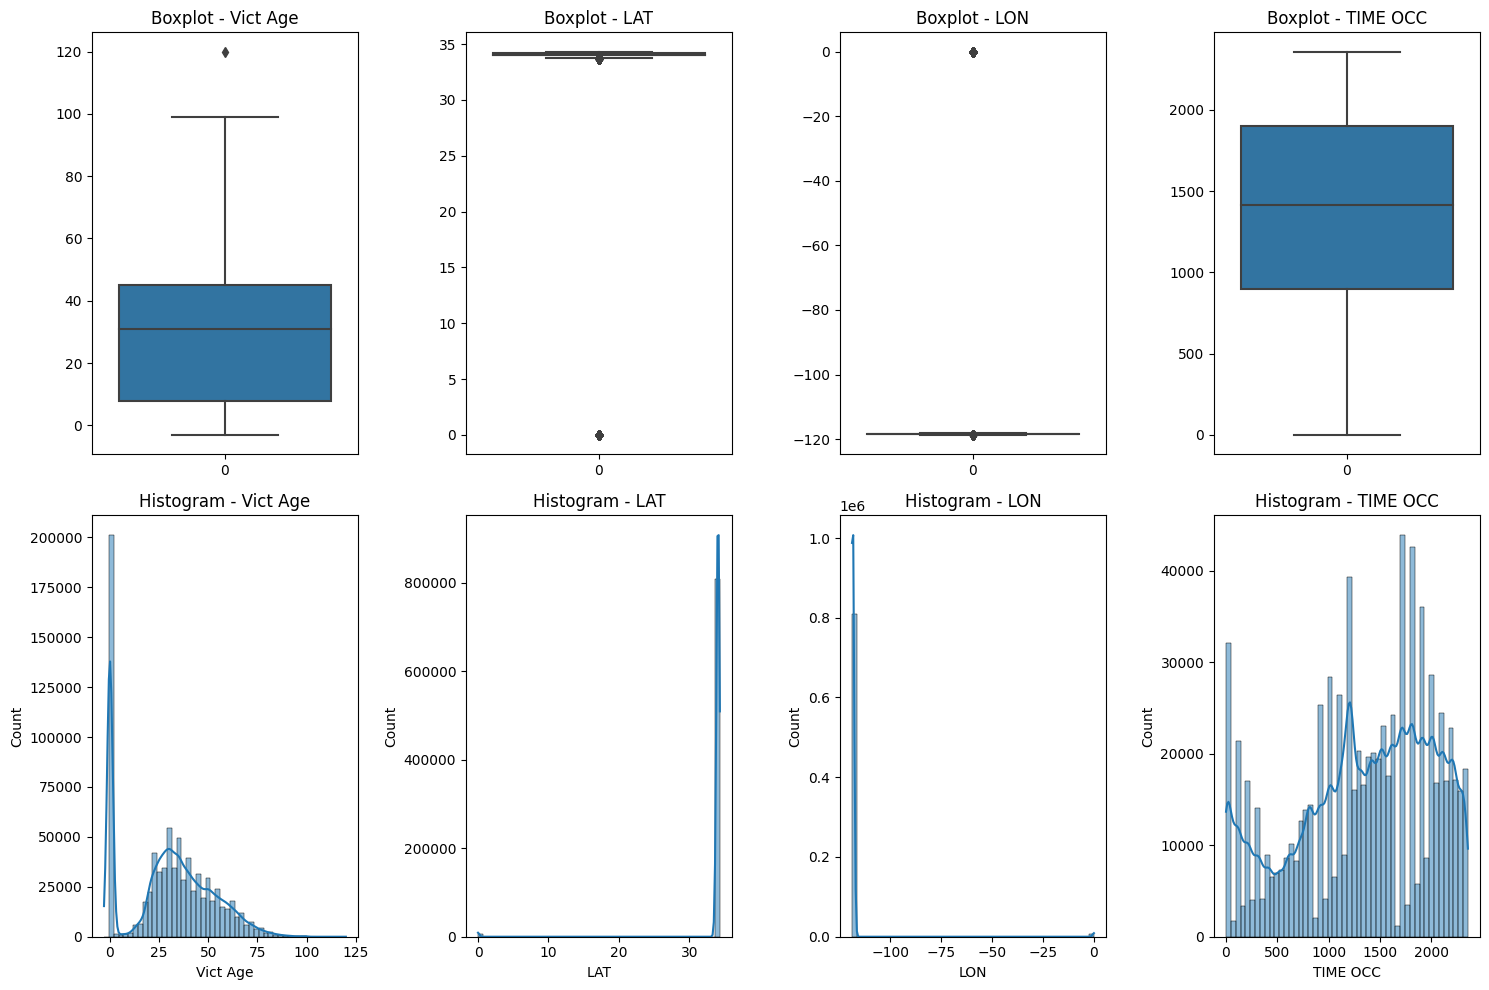

In [ ]:
# List of columns to check for outliers
columns_to_check = ['Vict Age', 'LAT', 'LON', 'TIME OCC']

# Plotting the distributions and boxplots for these columns
plt.figure(figsize=(15, 10))

for idx, col in enumerate(columns_to_check, 1):
    plt.subplot(2, len(columns_to_check), idx)
    sns.boxplot(df[col])
    plt.title(f"Boxplot - {col}")

    plt.subplot(2, len(columns_to_check), idx + len(columns_to_check))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Histogram - {col}")

plt.tight_layout()
plt.show()

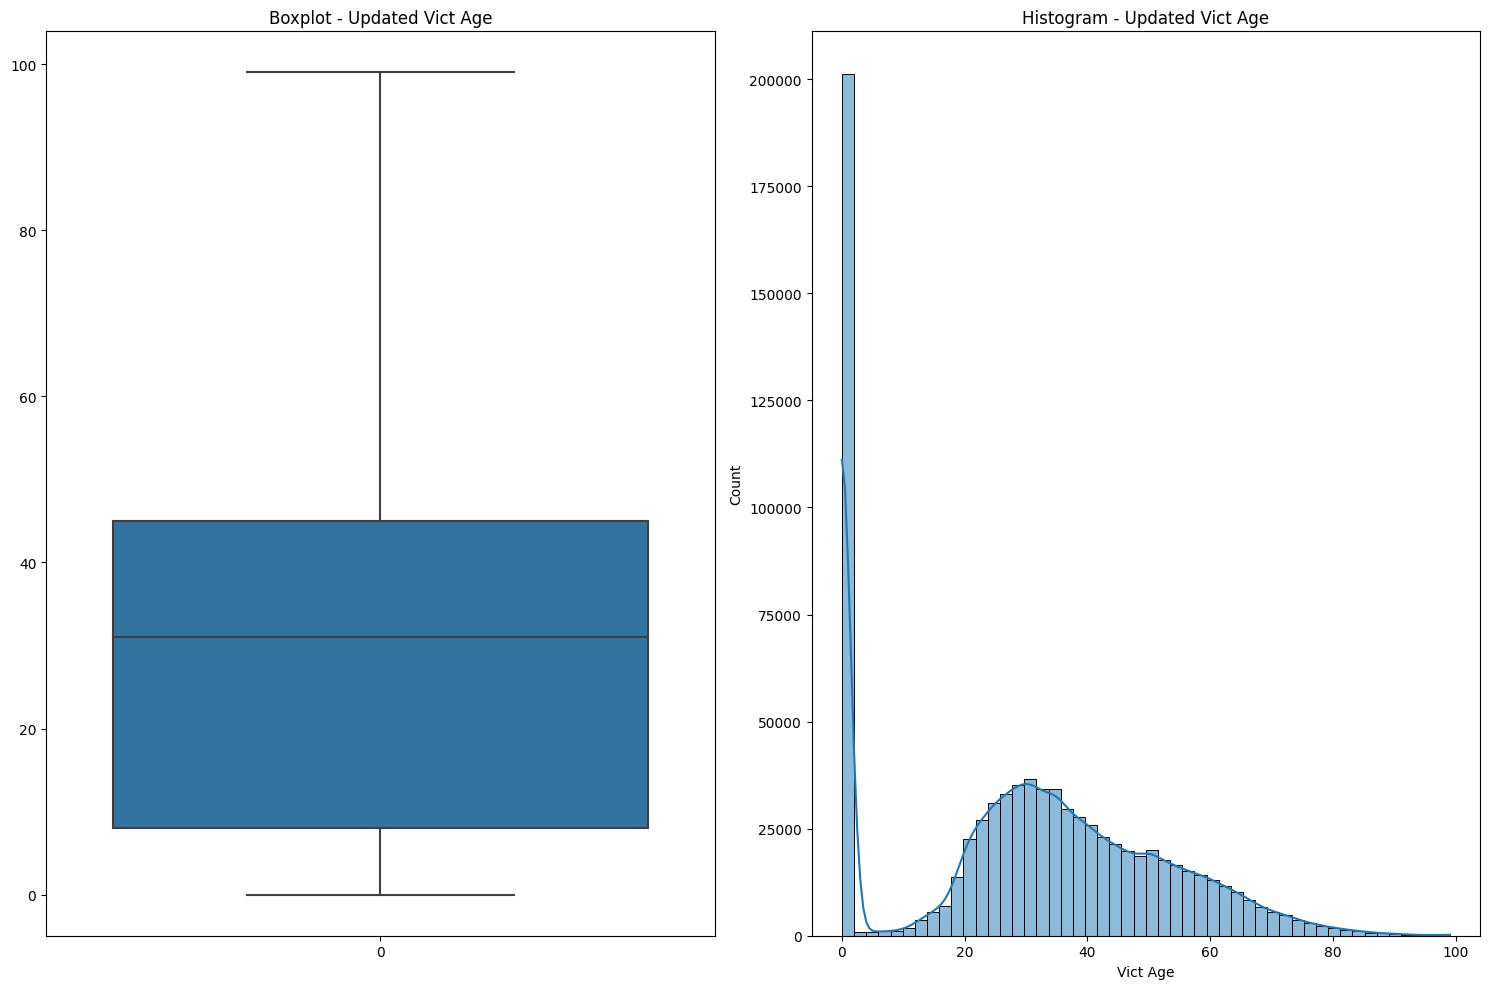

In [ ]:
# Calculate the median age
median_age = df['Vict Age'].median()

# Replace outliers in 'Vict Age' with the median age
df['Vict Age'] = df['Vict Age'].apply(lambda x: median_age if x < 0 or x > 100 else x)

# Visualize the updated 'Vict Age' column
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
sns.boxplot(df['Vict Age'])
plt.title("Boxplot - Updated Vict Age")

plt.subplot(1, 2, 2)
sns.histplot(df['Vict Age'], bins=50, kde=True)
plt.title("Histogram - Updated Vict Age")

plt.tight_layout()
plt.show()

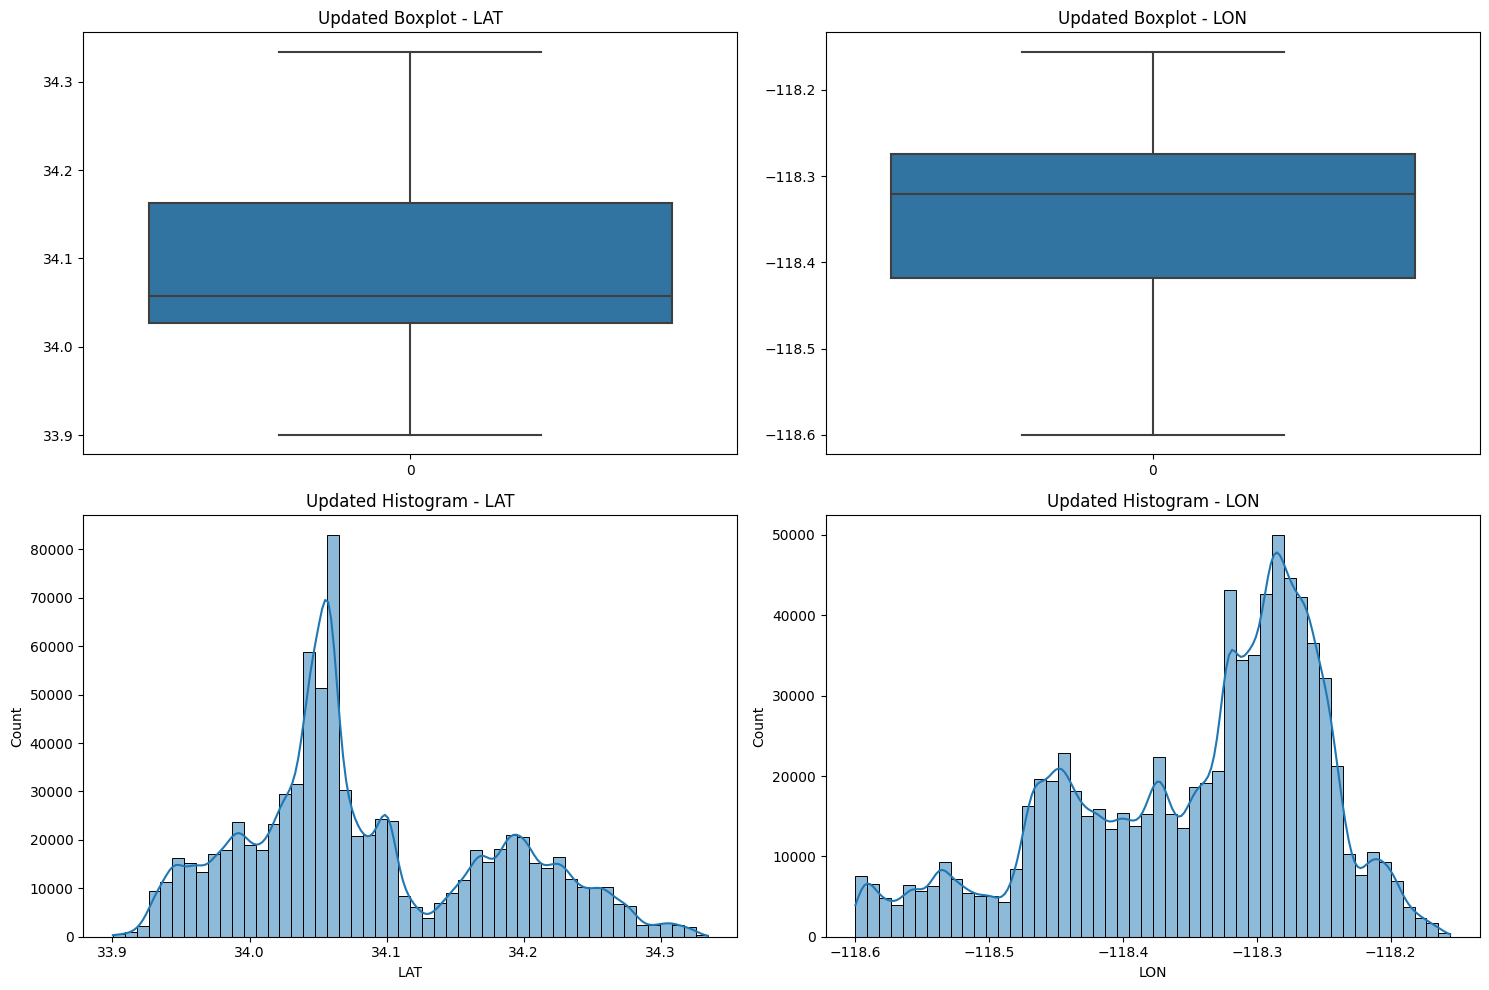

In [ ]:
# Calculate the median LAT and LOG
median_lat = df['LAT'].median()
median_lon = df['LON'].median()

df['LAT'] = df['LAT'].apply(lambda x: median_lat if x < 33.9 or x > 34.5 else x)
df['LON'] = df['LON'].apply(lambda x: median_lon if x < -118.6 or x > -117.5 else x)

columns_to_check = ['LAT', 'LON']

plt.figure(figsize=(15, 10))

for idx, col in enumerate(columns_to_check, 1):
    plt.subplot(2, len(columns_to_check), idx)
    sns.boxplot(df[col])
    plt.title(f"Updated Boxplot - {col}")

    plt.subplot(2, len(columns_to_check), idx + len(columns_to_check))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Updated Histogram - {col}")

plt.tight_layout()
plt.show()

Question 1:
1. Overall Crime Trends:
* Calculate and plot the total number of crimes per year to visualize the trends.

Yearly Crime Count:
2020    199398
2021    209334
2022    234199
2023    172951
Name: Year, dtype: int64


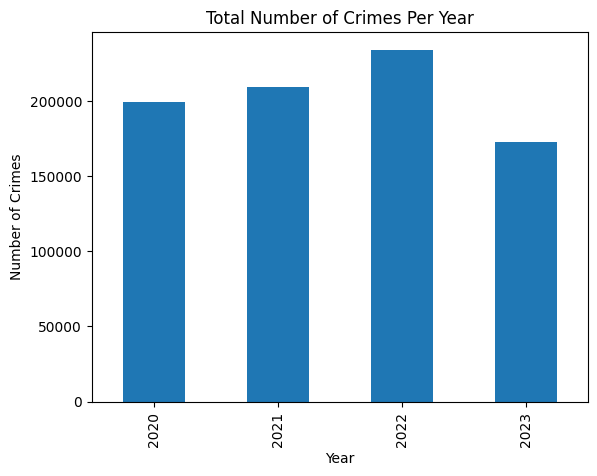

In [ ]:
# Convert 'DATE OCC' to datetime and extract the year
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['Year'] = df['DATE OCC'].dt.year

# Group by the year to count the number of crimes
yearly_crimes = df['Year'].value_counts().sort_index()

# Display the result
print(f'Yearly Crime Count:\n{yearly_crimes}')

yearly_crimes.plot(kind='bar')
plt.title('Total Number of Crimes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

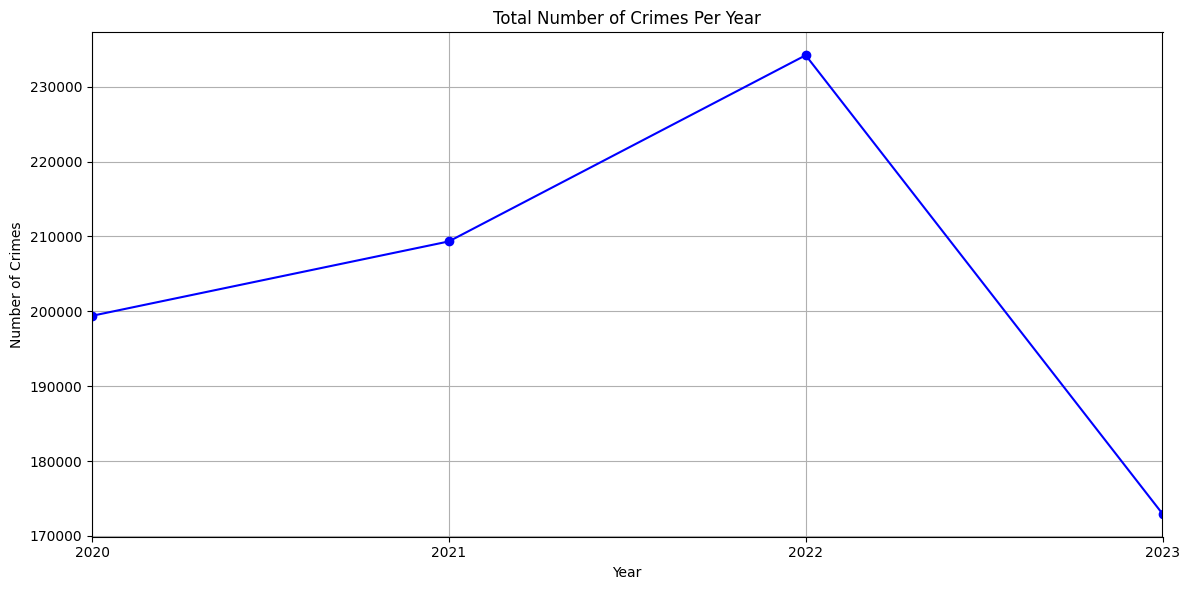

In [ ]:
# Group data by year and count the number of crimes
yearly_crimes = df.resample('Y', on='DATE OCC').size()

# Plotting the total number of crimes per year
plt.figure(figsize=(12, 6))
yearly_crimes.plot(kind='line', marker='o', color='blue')
plt.title('Total Number of Crimes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.tight_layout()
plt.show()

2. Seasonal Patterns:
* Group the data by month and analyze the average number of crimes per month over the years

In [ ]:
df['Month'] = df['DATE OCC'].dt.month

# Group the data by month to get the total number of crimes for each month across all years
monthly_crimes_total = df['Month'].value_counts().sort_index()

latest_year = df['Year'].max()
latest_year_count = df[df['Year'] == latest_year]['Month'].value_counts().sort_index()

# 2023 data is not for the full year, we adjust the divisor accordingly
divisor = 4 if len(latest_year_count) == 12 else 3

average_monthly_crimes = monthly_crimes_total / divisor

average_monthly_crimes

1     24335.333333
2     22870.000000
3     23707.666667
4     23399.666667
5     24414.000000
6     24249.333333
7     25081.666667
8     24893.000000
9     23632.333333
10    19948.333333
11    17515.666667
12    17913.666667
Name: Month, dtype: float64

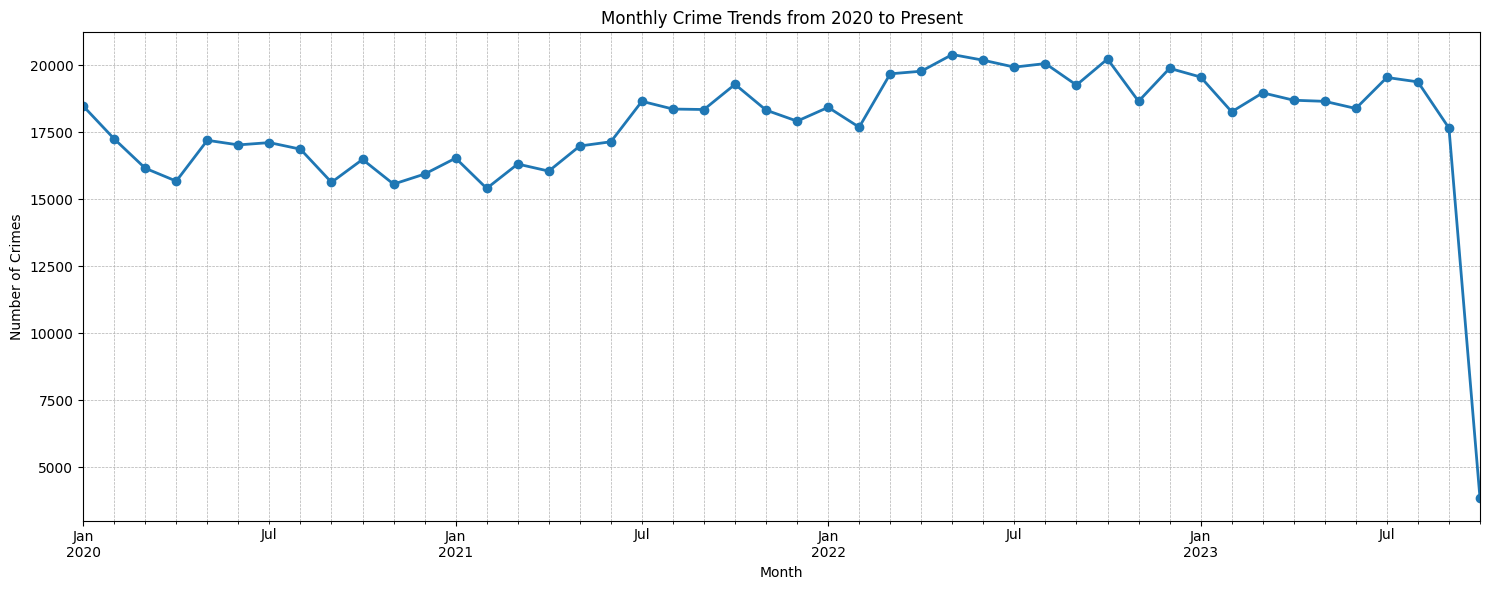

In [ ]:
# Group data by month and count the number of crimes for each month
crime_trends = df.groupby(df['DATE OCC'].dt.to_period("M")).size()

plt.figure(figsize=(15, 6))
crime_trends.plot(linewidth=2, marker='o')
plt.title('Monthly Crime Trends from 2020 to Present')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

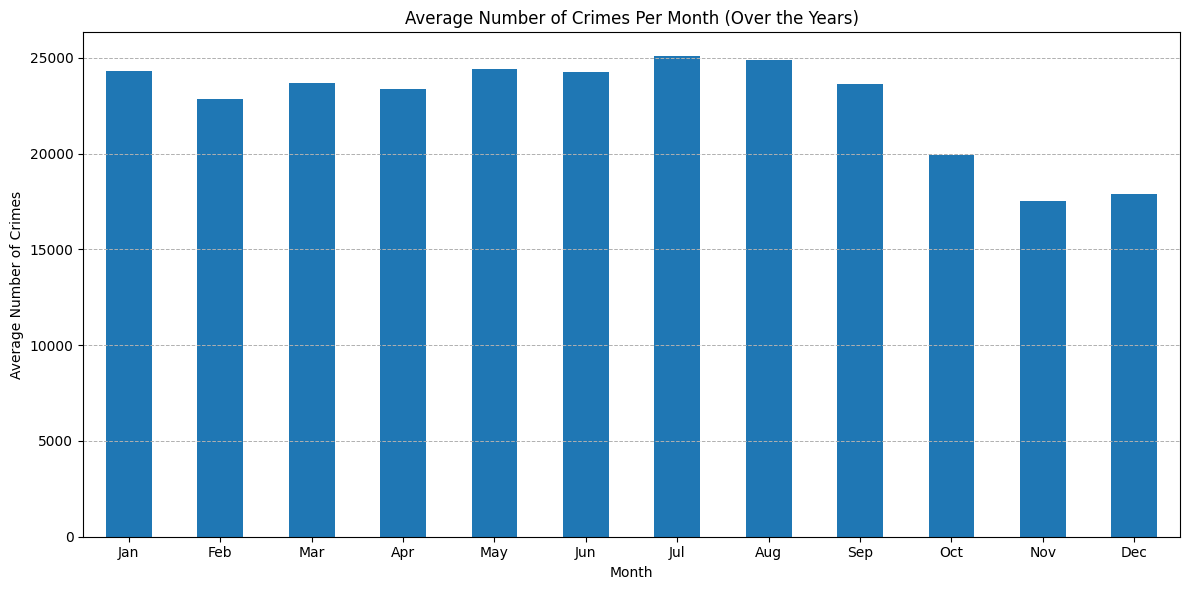

In [ ]:
# Plotting the average number of crimes per month
plt.figure(figsize=(12, 6))

average_monthly_crimes.plot(kind='bar')

plt.title('Average Number of Crimes Per Month (Over the Years)')
plt.xlabel('Month')
plt.ylabel('Average Number of Crimes')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

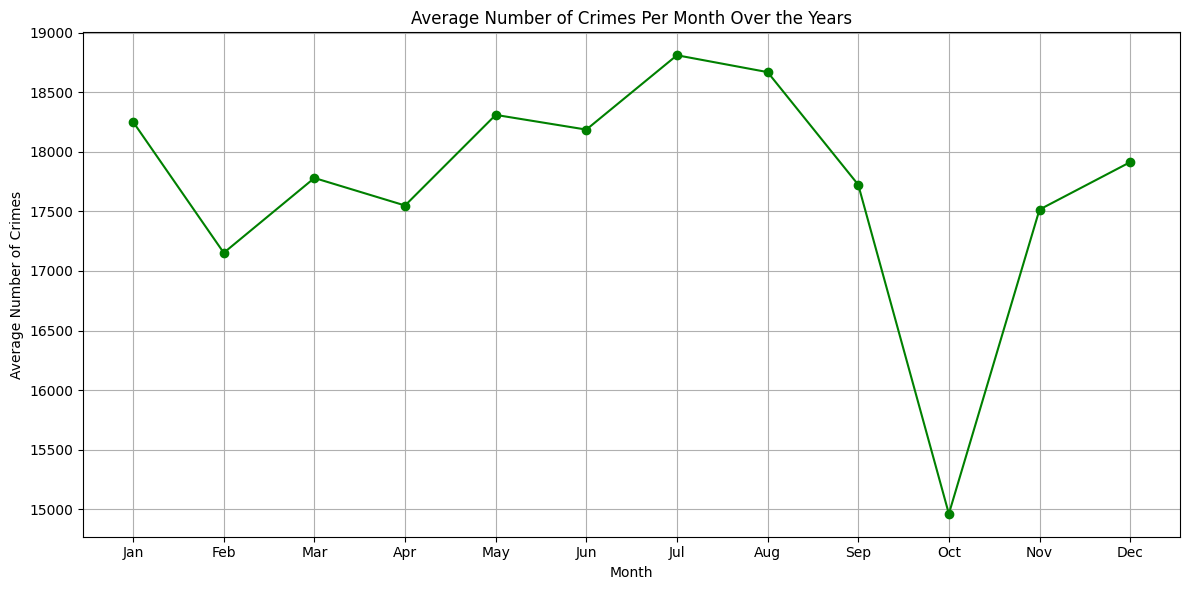

In [ ]:
# Group data by month and count the number of crimes
monthly_avg_crimes = df.resample('M', on='DATE OCC').size().groupby(lambda x: x.month).mean()

# Plotting the average number of crimes per month over the years
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(12, 6))
monthly_avg_crimes.plot(kind='line', marker='o', color='green')
plt.title('Average Number of Crimes Per Month Over the Years')
plt.xlabel('Month')
plt.xticks(ticks=range(1, 13), labels=months)
plt.ylabel('Average Number of Crimes')
plt.grid(True)
plt.tight_layout()
plt.show()

3. Most Common Crime Type:
* Count the occurrences of each crime type and identify the one with the highest
frequency

In [ ]:
# Count the occurrences of each crime type
crime_counts = df['Crm Cd Desc'].value_counts()

most_common_crime = crime_counts.idxmax()
most_common_crime_count = crime_counts.max()

most_common_crime, most_common_crime_count

('VEHICLE - STOLEN', 87356)

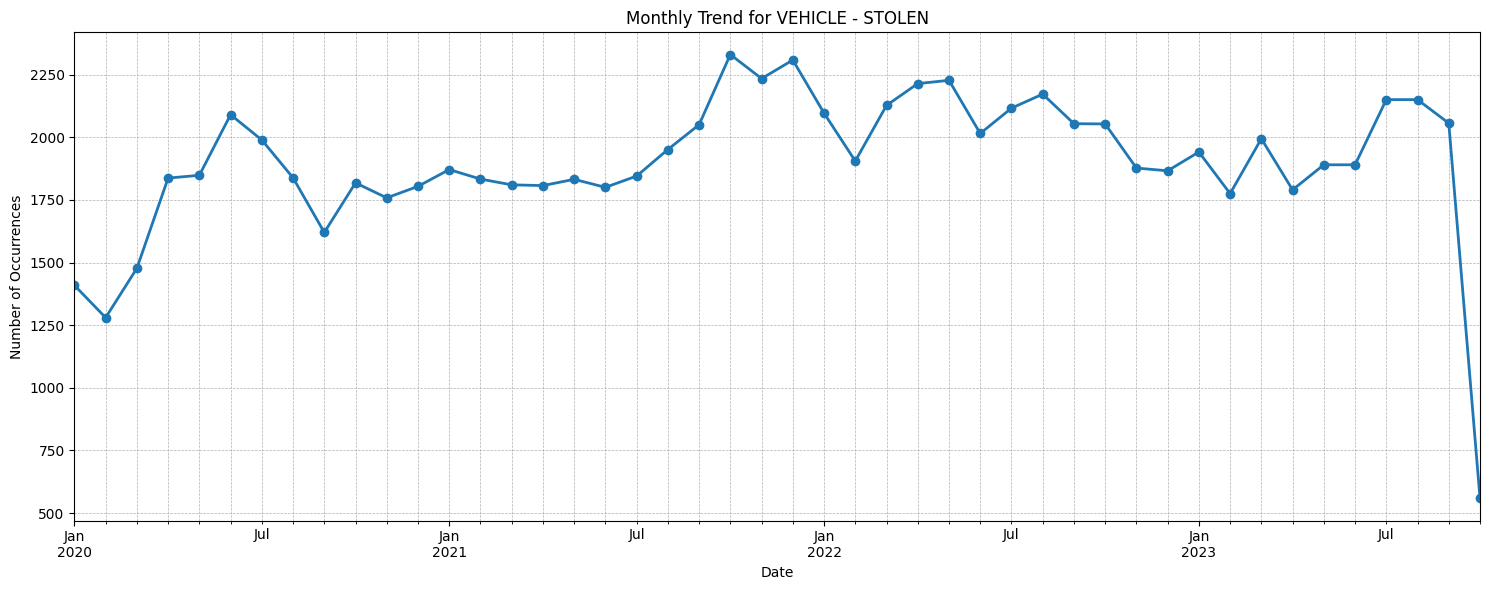

In [ ]:
# Filter data for the most common crime and group by month to get the trend
most_common_crime_trend = df[df['Crm Cd Desc'] == most_common_crime].groupby(df['DATE OCC'].dt.to_period("M")).size()

plt.figure(figsize=(15, 6))
most_common_crime_trend.plot(linewidth=2, marker='o')
plt.title(f'Monthly Trend for {most_common_crime}')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

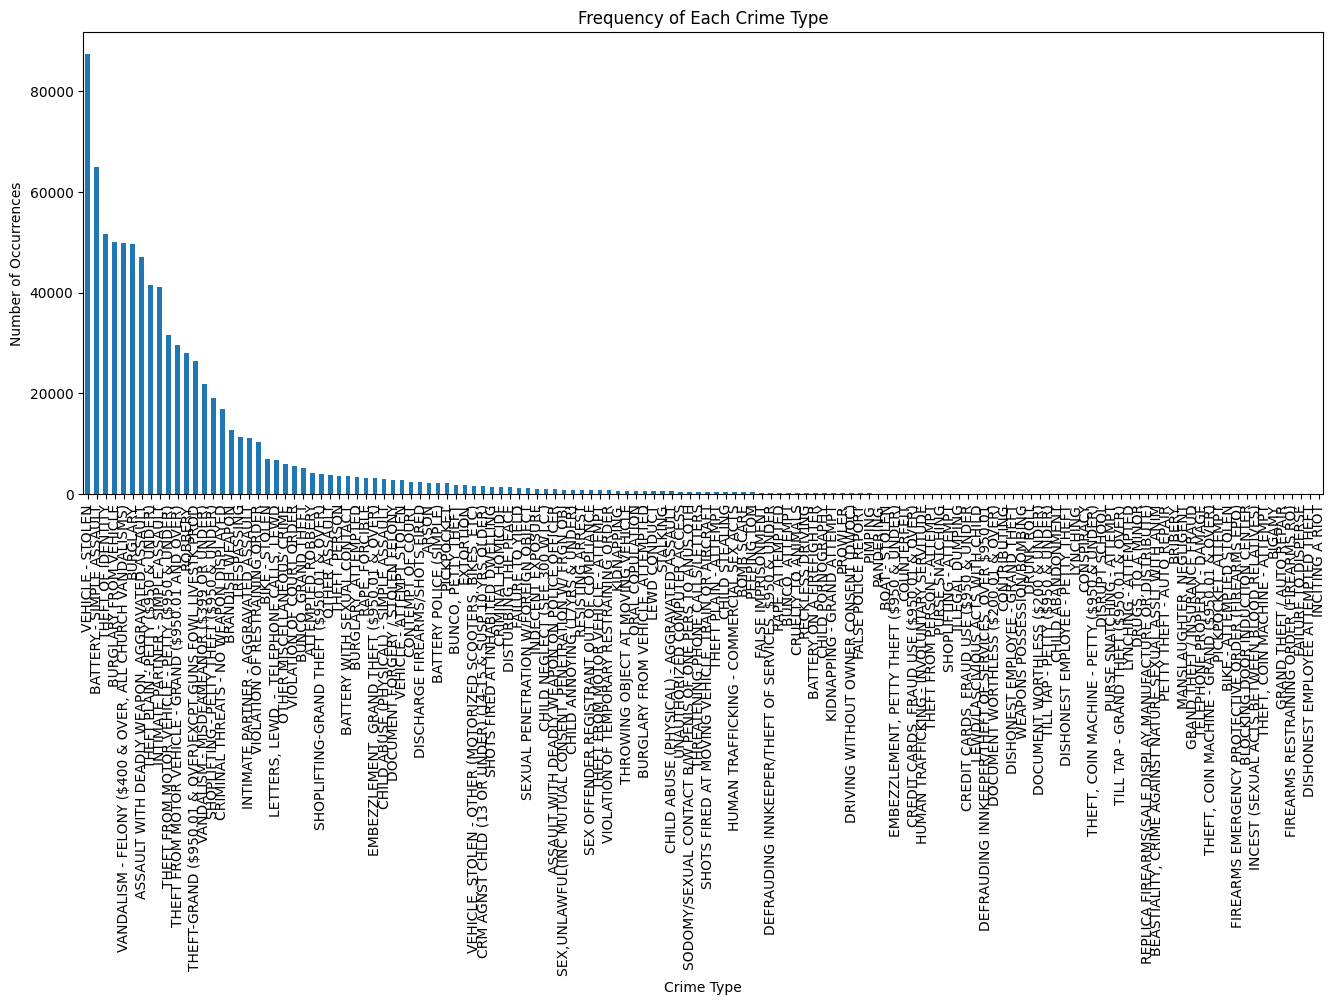

In [ ]:
crime_counts = df['Crm Cd Desc'].value_counts()
crime_counts.plot(kind='bar', figsize=(16, 6))
plt.title('Frequency of Each Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Number of Occurrences')
plt.show()

4. Regional Differences:
* Group the data by region or city and compare crime rates between them using
descriptive statistics or visualizations.

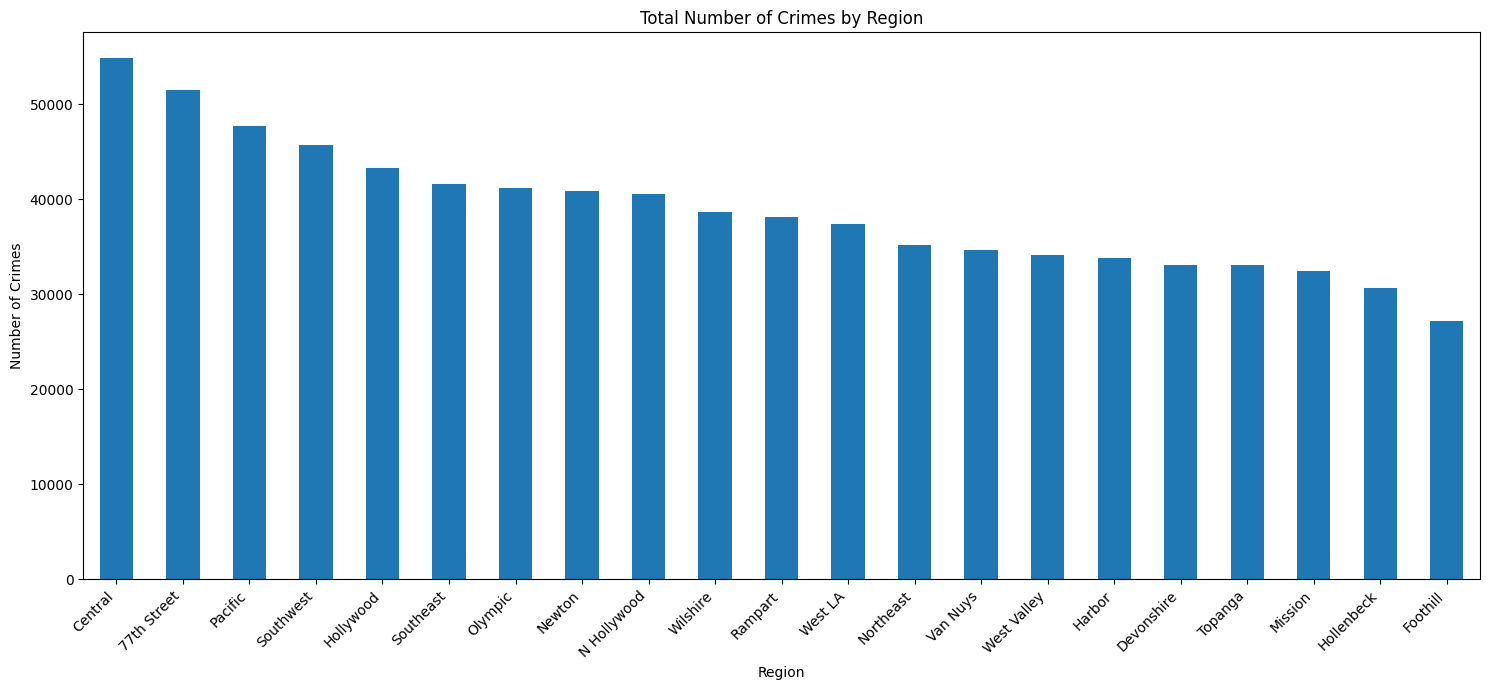

In [ ]:
# Aggregate data by 'AREA NAME' to get the total number of crimes for each region
crime_by_area = df['AREA NAME'].value_counts()

plt.figure(figsize=(15, 7))
crime_by_area.plot(kind='bar')
plt.title('Total Number of Crimes by Region')
plt.xlabel('Region')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

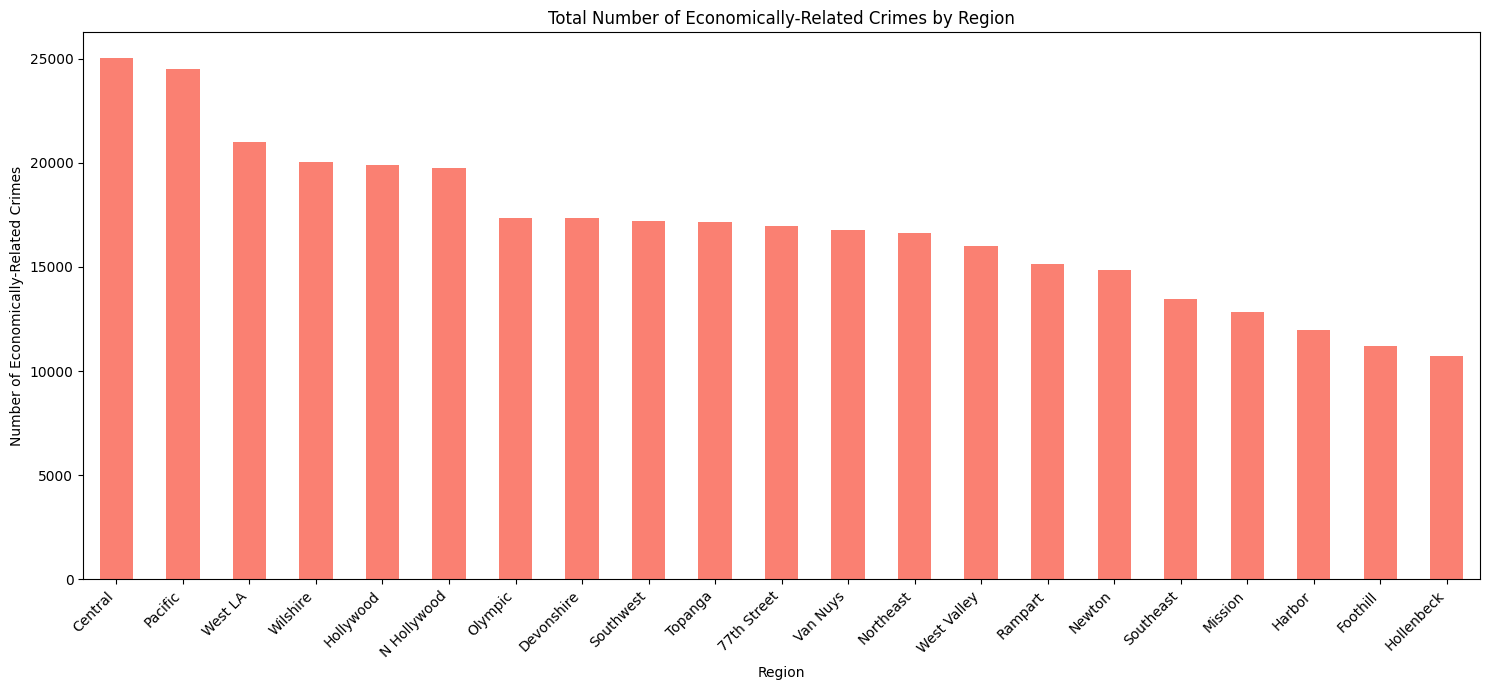

In [ ]:
# Filter data for specific crime types indicative of economic challenges
economically_related_crimes_list = ["THEFT", "BURGLARY", "ROBBERY", "FRAUD", "EMBEZZLEMENT"]
economically_related_crimes_data = df[df['Crm Cd Desc'].str.contains('|'.join(economically_related_crimes_list), na=False, case=False)]

# Aggregate data by 'AREA NAME' to get the total number of these specific crimes for each region
economically_related_crimes_by_area_2 = economically_related_crimes_data['AREA NAME'].value_counts()

plt.figure(figsize=(15, 7))
economically_related_crimes_by_area_2.plot(kind='bar', color='salmon')
plt.title('Total Number of Economically-Related Crimes by Region')
plt.xlabel('Region')
plt.ylabel('Number of Economically-Related Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

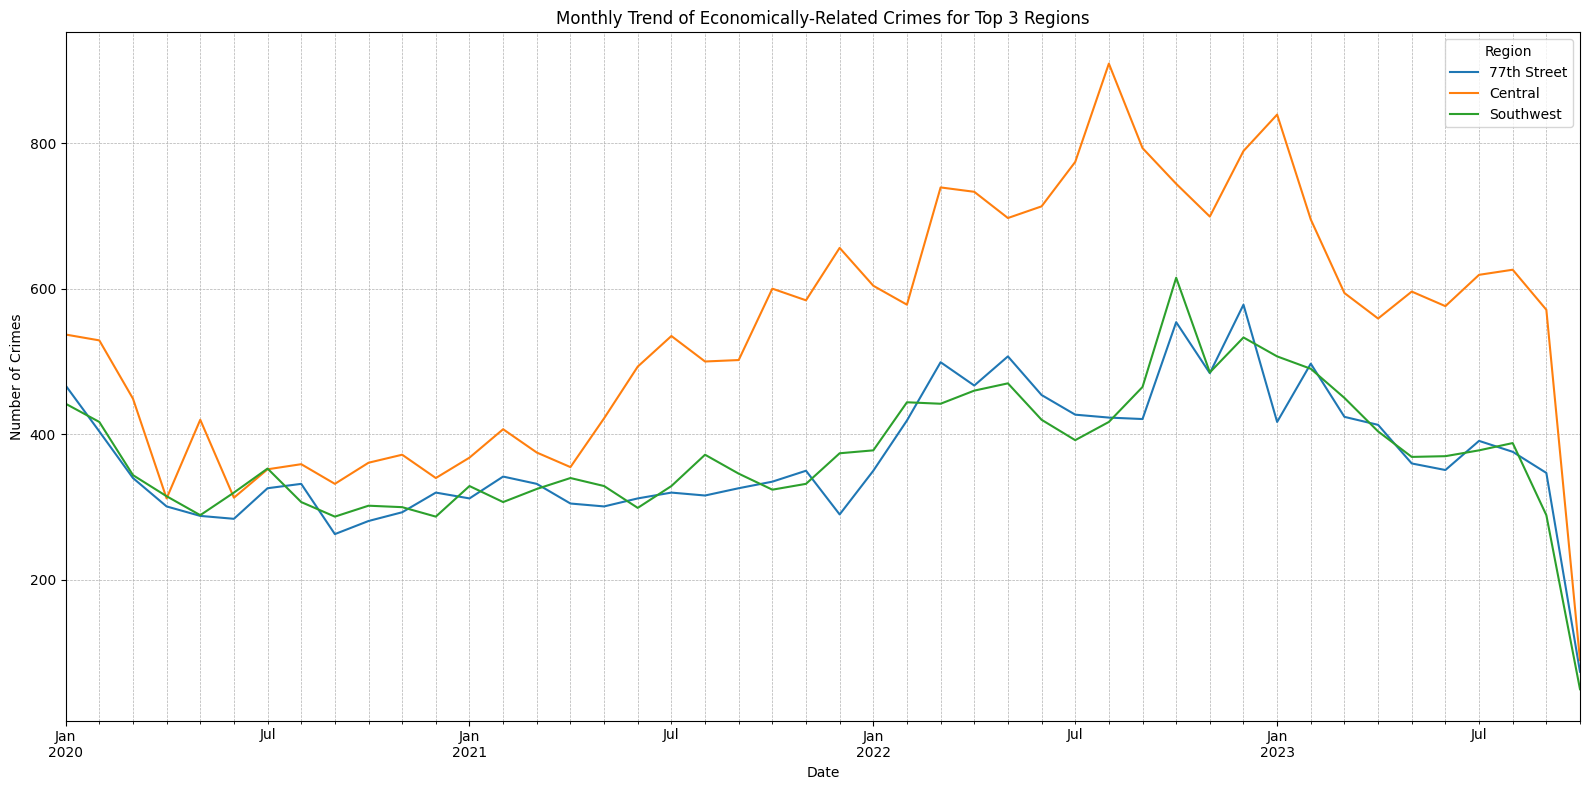

In [ ]:
# Select the top 3 regions with the highest rates of economically-related crimes
top_regions = ["Central", "Southwest", "77th Street"]

# Filter the dataset for these specific regions and crime types
filtered_data_for_trends = economically_related_crimes_data[economically_related_crimes_data['AREA NAME'].isin(top_regions)]

# Group by month and region to get the trend over time
crime_trends_by_region = filtered_data_for_trends.groupby([filtered_data_for_trends['DATE OCC'].dt.to_period("M"), 'AREA NAME']).size().unstack()

plt.figure(figsize=(16, 8))
crime_trends_by_region.plot(ax=plt.gca())
plt.title('Monthly Trend of Economically-Related Crimes for Top 3 Regions')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend(title='Region')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

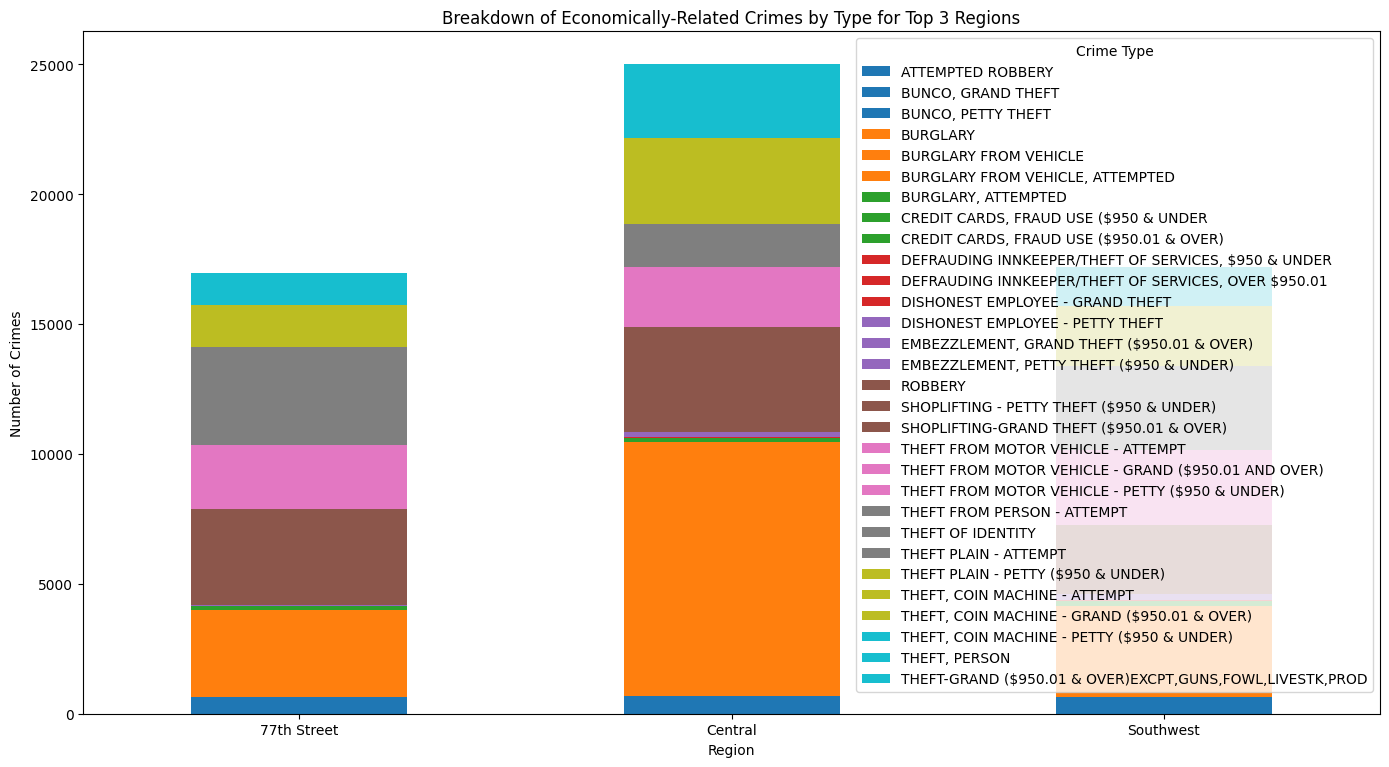

In [ ]:
# Group the filtered data by region and crime type to get the breakdown
crime_breakdown_by_region = filtered_data_for_trends.groupby(['AREA NAME', 'Crm Cd Desc']).size().unstack()

# Plotting the breakdown of economically-related crimes by type for each region
crime_breakdown_by_region.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab10')
plt.title('Breakdown of Economically-Related Crimes by Type for Top 3 Regions')
plt.xlabel('Region')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.legend(title='Crime Type')
plt.tight_layout()
plt.show()

5. Correlation with Economic Factors:
* Collect economic data for the same time frame and use statistical methods like
correlation analysis to assess the relationship between economic factors and crime
rates.

#I found an economy dataset and tried to interpert both the dataset with the lat and lon with the time series. And tried the corelation. I'm not sure about the results. Please crosscheck.

In [ ]:
# Filter the income data for entries related to Los Angeles County
crime_data_path = '/content/Crime_Data_from_2020_to_Present.csv'
la_income_data = income_df[income_df['County'].str.contains('Los Angeles', case=False, na=False)]

crime_data_sample = pd.read_csv(crime_data_path, usecols=['DATE OCC', 'LAT', 'LON'])

# Show the head of the filtered income data and the crime data sample
print(f'LA Income Data:\n{la_income_data.head()}\nCrime Data:\n{crime_data_sample.head()}')

LA Income Data:
           id  State_Code  State_Name State_ab              County  \
1612  6012088           6  California       CA  Los Angeles County   
1617  6012138           6  California       CA  Los Angeles County   
1619  6012158           6  California       CA  Los Angeles County   
1624  6012208           6  California       CA  Los Angeles County   
1628  6012248           6  California       CA  Los Angeles County   

             City                  Place  Type Primary  Zip_Code Area_Code  \
1612       Covina            Charter Oak   CDP   place     91724       626   
1617      Compton           Compton city  City   place     90220       310   
1619  West Covina            Covina city  City   place     91723       626   
1624  Diamond Bar       Diamond Bar city  City   place     91765       909   
1628      Compton  East Rancho Dominguez   CDP   place     90221       310   

         ALand  AWater        Lat         Lon    Mean  Median  Stdev  \
1612   2403064       0

In [ ]:
# Define the columns we need from the crime dataset for the correlation analysis
crime_data_columns = ['DATE OCC', 'LAT', 'LON', 'Crm Cd Desc']  # 'Crm Cd Desc' for the type of crime

# We'll load in chunks due to the large size of the file
chunksize = 50000

# Initialize an empty dataframe to hold the concatenated chunks
full_crime_data = pd.DataFrame()

# Read the file in chunks and process each chunk
for chunk in pd.read_csv(crime_data_path, usecols=crime_data_columns, chunksize=chunksize):
    # Convert the date column to datetime and extract the year
    chunk['DATE OCC'] = pd.to_datetime(chunk['DATE OCC'])
    chunk['Year'] = chunk['DATE OCC'].dt.year

    # Filter out data before 2020 since the economic data is for 2020 to 2021
    chunk = chunk[chunk['Year'] >= 2020]

    # Concatenate the chunk to the full dataframe
    full_crime_data = pd.concat([full_crime_data, chunk], ignore_index=True)

print(full_crime_data.head())

    DATE OCC                                        Crm Cd Desc      LAT  \
0 2020-01-08                           BATTERY - SIMPLE ASSAULT  34.0141   
1 2020-01-01                           BATTERY - SIMPLE ASSAULT  34.0459   
2 2020-02-13          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  34.0448   
3 2020-01-01           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  34.1685   
4 2020-01-01  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  34.2198   

        LON  Year  
0 -118.2978  2020  
1 -118.2545  2020  
2 -118.2474  2020  
3 -118.4019  2020  
4 -118.4468  2020  


In [ ]:
# join on a sample of the full crime data to ensure the process works before scaling up.
la_income_data[['Lat_radians','Lon_radians']] = np.radians(la_income_data[['Lat', 'Lon']])

tree = BallTree(la_income_data[['Lat_radians', 'Lon_radians']], metric='haversine')

crime_data_sample = full_crime_data.sample(n=5000, random_state=1)

# Convert the latitude and longitude to radians for the crime data sample
crime_data_sample[['Lat_radians','Lon_radians']] = np.radians(crime_data_sample[['LAT', 'LON']])

# Perform the spatial join on the sample
distances, indices = tree.query(crime_data_sample[['Lat_radians', 'Lon_radians']], k=1)

# Add the nearest income data information to the crime data sample
crime_data_sample['Closest_Income_Index'] = indices.flatten()
crime_data_sample['Distance_to_Closest_Income'] = distances.flatten() * 6371  # Convert to km

# Merge the nearest income data to the crime data sample based on the index
la_income_data.reset_index(inplace=True)
crime_data_with_income_sample = crime_data_sample.merge(
    la_income_data,
    left_on='Closest_Income_Index',
    right_on=la_income_data.index,
    how='left'
)

# Select only the relevant columns from the income data to avoid cluttering the dataset
columns_to_keep = ['DATE OCC', 'Crm Cd Desc', 'LAT', 'LON', 'Year', 'Closest_Income_Index', 'Distance_to_Closest_Income', 'Mean', 'Median', 'Stdev']
crime_data_with_income_sample = crime_data_with_income_sample[columns_to_keep]

print(crime_data_with_income_sample.head())

    DATE OCC        Crm Cd Desc      LAT       LON  Year  \
0 2023-07-10     RAPE, FORCIBLE  34.2768 -118.3929  2023   
1 2022-05-28           BURGLARY  34.0289 -118.2686  2022   
2 2023-08-18           BURGLARY  34.1586 -118.4793  2023   
3 2021-12-02  THEFT OF IDENTITY  34.0908 -118.2669  2021   
4 2020-02-23           BURGLARY  34.2394 -118.4894  2020   

   Closest_Income_Index  Distance_to_Closest_Income    Mean  Median  Stdev  
0                    11                   32.062321   80845   72205  53806  
1                    15                   10.171190   39928   26090  41109  
2                     5                   27.787868  104661   86968  70772  
3                    15                   16.891281   39928   26090  41109  
4                    11                   28.826506   80845   72205  53806  


<ipython-input-127-bd0c6407c5ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_income_data[['Lat_radians','Lon_radians']] = np.radians(la_income_data[['Lat', 'Lon']])
<ipython-input-127-bd0c6407c5ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_income_data[['Lat_radians','Lon_radians']] = np.radians(la_income_data[['Lat', 'Lon']])


In [ ]:
# One-hot encode the 'Crm Cd Desc' column for the types of crimes in the sample
crime_types_encoded = pd.get_dummies(crime_data_with_income_sample['Crm Cd Desc'], prefix='Type')

# Join the encoded crime types with the original sample data
crime_data_with_income_encoded = crime_data_with_income_sample.join(crime_types_encoded)

# Now let's calculate the correlation matrix for economic indicators and encoded crime types
#mean income as an economic indicator
correlation_matrix = crime_data_with_income_encoded.corr()

# Extract the correlation coefficients between the mean income and the crime types
mean_income_correlations = correlation_matrix.loc[crime_types_encoded.columns, 'Mean'].sort_values(ascending=False)

mean_income_correlations.head(10)  # Display the top 10 correlations with mean income

<ipython-input-128-d64212b15b08>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = crime_data_with_income_encoded.corr()


Type_THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    0.064707
Type_BURGLARY                                                    0.055529
Type_VIOLATION OF COURT ORDER                                    0.038621
Type_LETTERS, LEWD  -  TELEPHONE CALLS, LEWD                     0.037727
Type_SHOPLIFTING-GRAND THEFT ($950.01 & OVER)                    0.027739
Type_VIOLATION OF RESTRAINING ORDER                              0.026224
Type_EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)                  0.025483
Type_CRIMINAL THREATS - NO WEAPON DISPLAYED                      0.025200
Type_THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)         0.024618
Type_RESISTING ARREST                                            0.023881
Name: Mean, dtype: float64

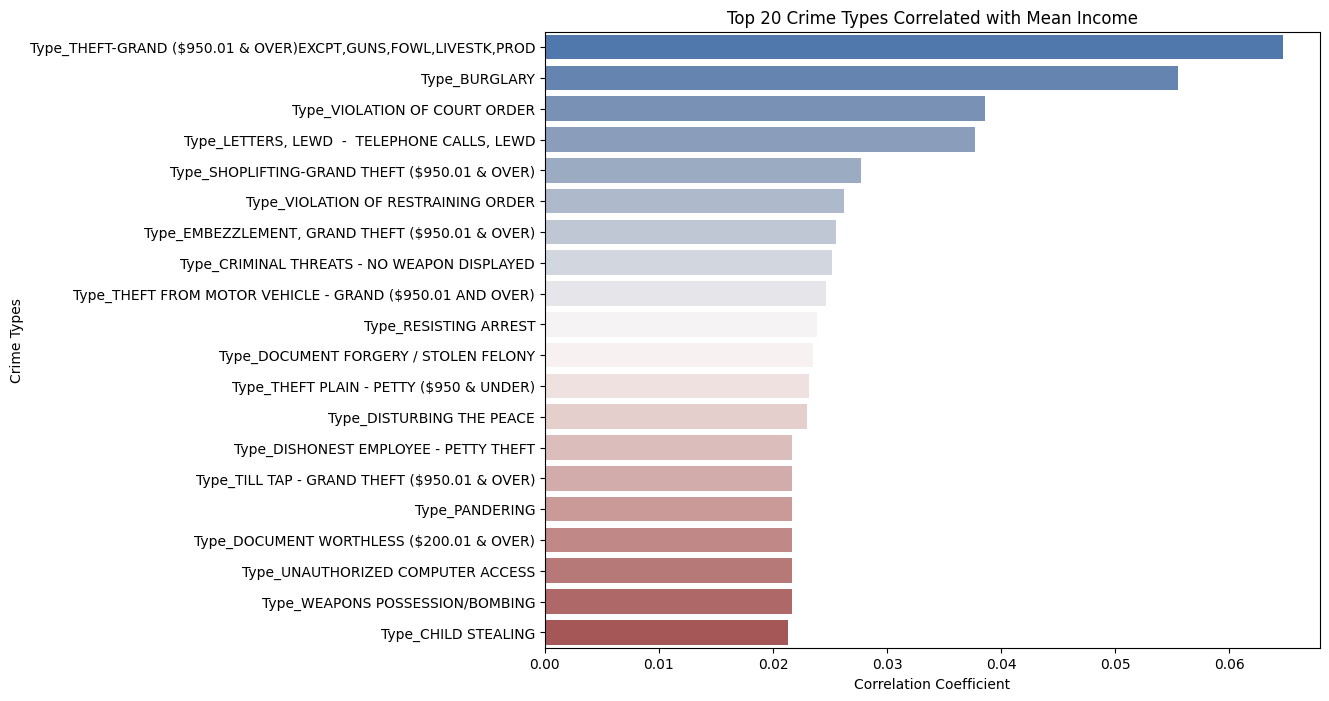

In [ ]:
top_mean_income_correlations = mean_income_correlations.head(20)

# Visualization using a bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=top_mean_income_correlations.values, y=top_mean_income_correlations.index, palette="vlag")
plt.title('Top 20 Crime Types Correlated with Mean Income')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Crime Types')
plt.show()

6. Day of the Week Analysis:
* Group the data by day of the week and analyze crime frequencies for each day.

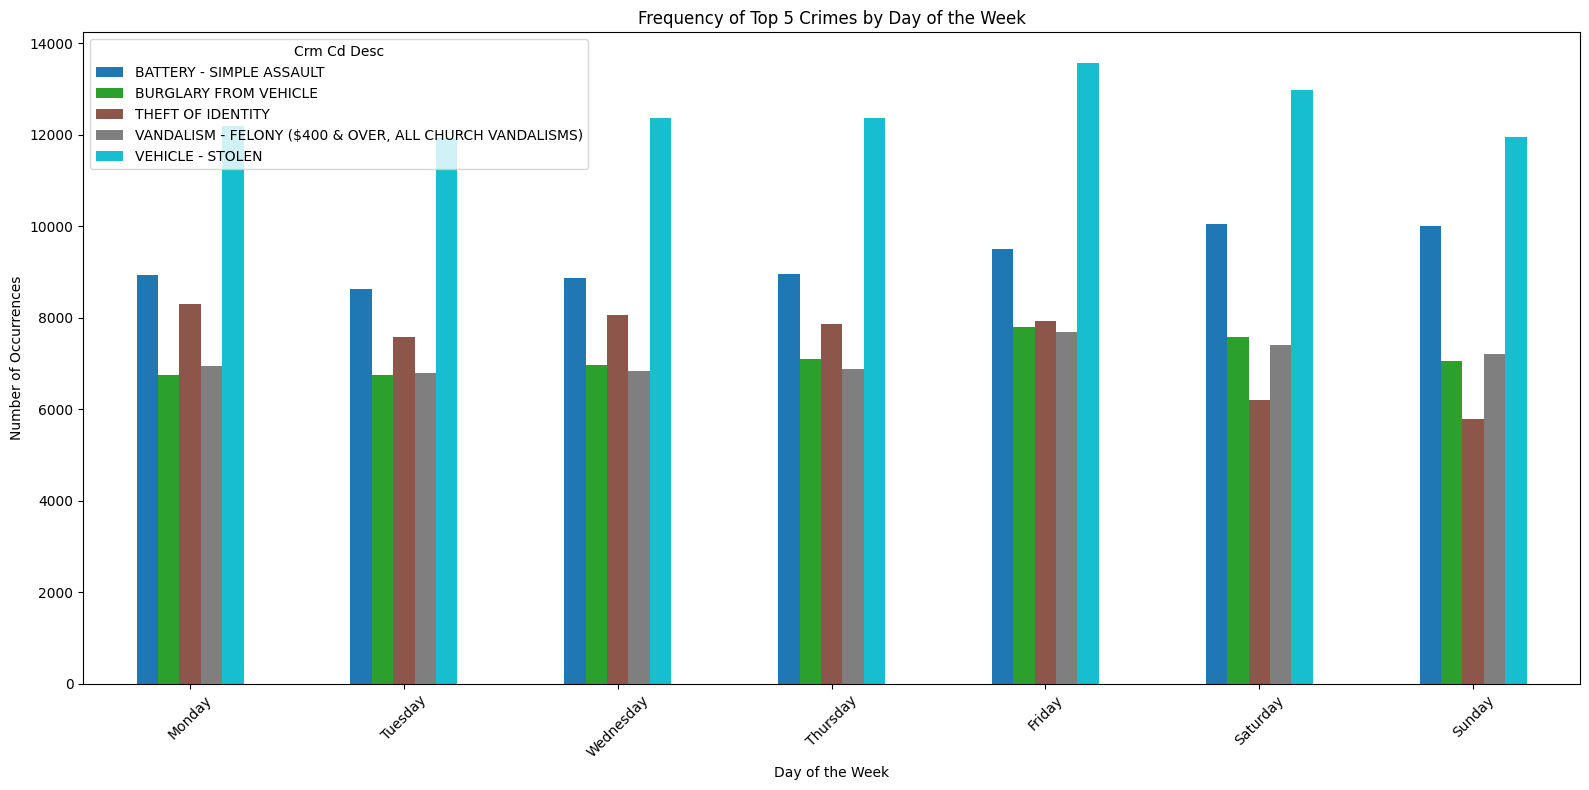

In [ ]:
# Extract the day of the week from the 'DATE OCC' column
df['Day of Week'] = df['DATE OCC'].dt.day_name()

# top 5 most common crimes for visualization
top_5_crimes = df['Crm Cd Desc'].value_counts().head(5).index.tolist()

# Filter the dataset for these top 5 crimes
filtered_data = df[df['Crm Cd Desc'].isin(top_5_crimes)]

# Group by the day of the week and the type of crime and count the occurrences
crime_by_day = filtered_data.groupby(['Day of Week', 'Crm Cd Desc']).size().unstack()

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_by_day = crime_by_day.reindex(order)

crime_by_day.plot(kind='bar', figsize=(16, 8), colormap='tab10')
plt.title('Frequency of Top 5 Crimes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

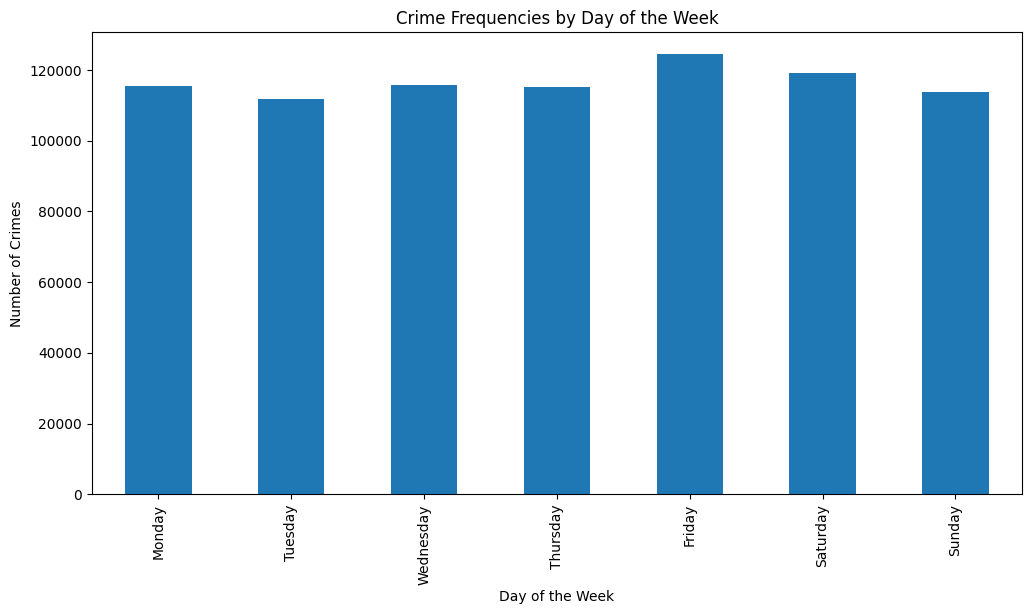

In [ ]:
df['Day of Week'] = df['DATE OCC'].dt.day_name()
day_counts = df['Day of Week'].value_counts()
day_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', figsize=(12, 6))
plt.title('Crime Frequencies by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.show()

7. Impact of Major Events:
* Identify major events or policy changes during the dataset period and analyze crime rate changes before and after these events.

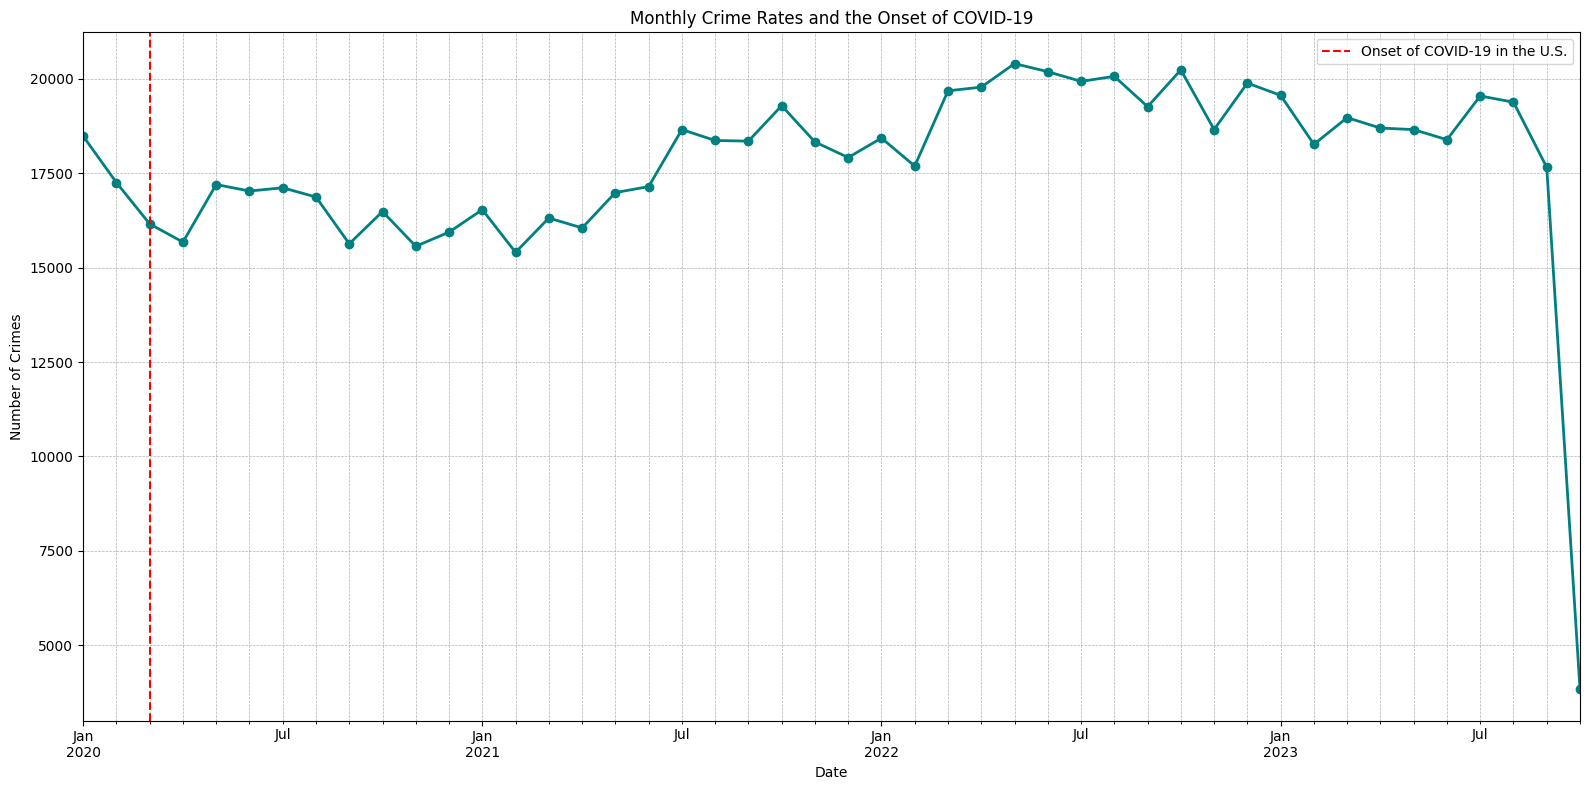

In [ ]:
# Extract monthly crime rates for the dataset
monthly_crime_rates = df.groupby(df['DATE OCC'].dt.to_period("M")).size()

# Plotting the crime rates around the onset of the COVID-19 pandemic
plt.figure(figsize=(16, 8))
monthly_crime_rates.plot(linewidth=2, marker='o', color='teal')
plt.axvline(pd.Timestamp('2020-03'), color='red', linestyle='--', label='Onset of COVID-19 in the U.S.')
plt.title('Monthly Crime Rates and the Onset of COVID-19')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

9. Demographic Factors:
* Analyze the dataset to identify any patterns or correlations between demographic factors (e.g., age, gender) and specific types of crimes.

In [ ]:
# Cleaning the gender data: We'll only consider 'F', 'M', and 'X' as valid gender categories.
crime_df_path = '/content/Crime_Data_from_2020_to_Present.csv'
crime_df = pd.read_csv(crime_data_path)

valid_genders = ['F', 'M', 'X']
crime_df['Vict Sex'] = crime_df['Vict Sex'].apply(lambda x: x if x in valid_genders else None)

# For age, we'll create age groups to facilitate the analysis
bins = [0, 17, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-100']
crime_df['Age Group'] = pd.cut(crime_df['Vict Age'], bins=bins, labels=labels, right=False)

# For crime types, we'll consider the top 10 most common crimes to make the analysis more manageable.
top_crimes = crime_df['Crm Cd Desc'].value_counts().nlargest(10).index
crime_data_top_crimes = crime_df[crime_df['Crm Cd Desc'].isin(top_crimes)]

# Now let's check the cleaned data
print(crime_data_top_crimes[['Vict Age', 'Vict Sex', 'Age Group', 'Crm Cd Desc']].head())

    Vict Age Vict Sex Age Group  \
0         36        F     35-44   
1         25        M     25-34   
4         31        X     25-34   
10        29        M     25-34   
15        24        F     18-24   

                                          Crm Cd Desc  
0                            BATTERY - SIMPLE ASSAULT  
1                            BATTERY - SIMPLE ASSAULT  
4   VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  
10                              BURGLARY FROM VEHICLE  
15                  INTIMATE PARTNER - SIMPLE ASSAULT  


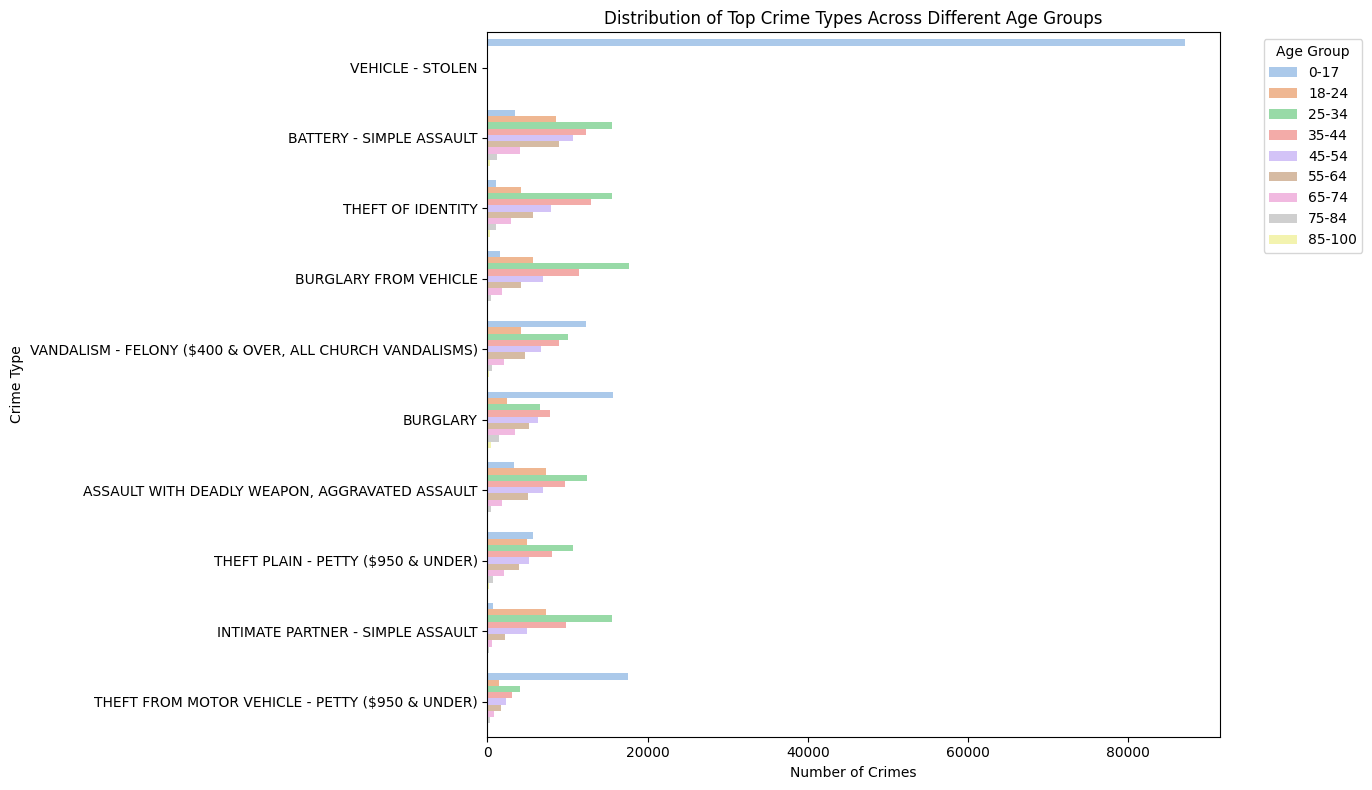

In [ ]:
plt.figure(figsize=(14, 8))
age_group_chart = sns.countplot(data=crime_data_top_crimes, y='Crm Cd Desc', hue='Age Group', palette='pastel', order=top_crimes)
age_group_chart.set_title('Distribution of Top Crime Types Across Different Age Groups')
age_group_chart.set_xlabel('Number of Crimes')
age_group_chart.set_ylabel('Crime Type')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

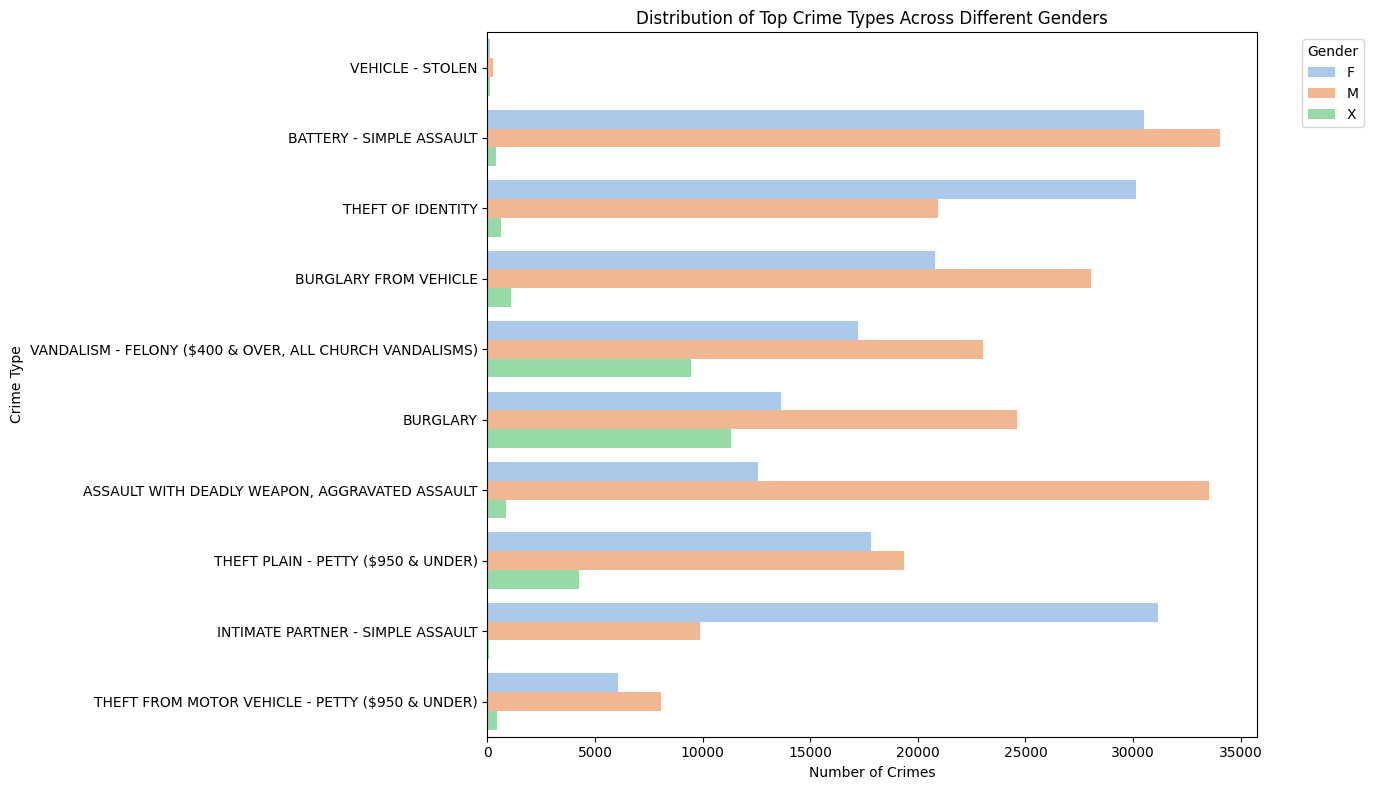

In [ ]:
# Bar chart showing the distribution of crime types across different genders
plt.figure(figsize=(14, 8))
gender_chart = sns.countplot(data=crime_data_top_crimes, y='Crm Cd Desc', hue='Vict Sex', palette='pastel', order=top_crimes)
gender_chart.set_title('Distribution of Top Crime Types Across Different Genders')
gender_chart.set_xlabel('Number of Crimes')
gender_chart.set_ylabel('Crime Type')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

10. Predicting Future Trends:
* Employ time series forecasting methods, such as ARIMA or Prophet, to predict
future crime trends based on historical data. Consider incorporating relevant
external factors into your models.

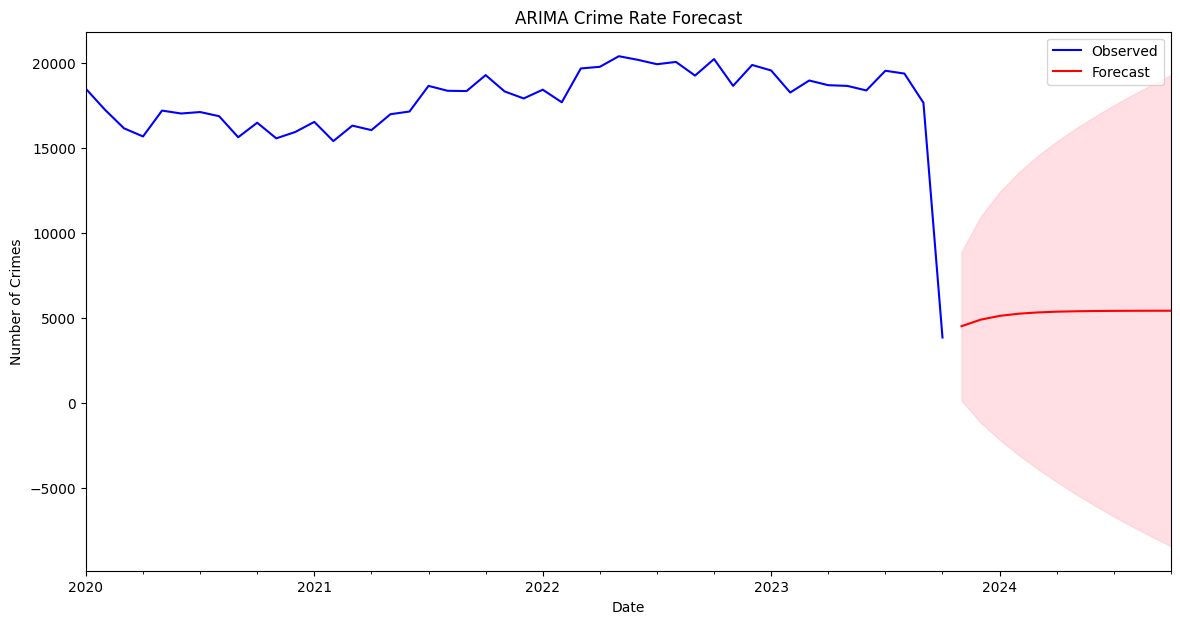

In [ ]:
# Aggregate data on a monthly basis
monthly_crimes = df.resample('M', on='DATE OCC').size()

# Define the ARIMA model (p,d,q) parameters. These can be fine-tuned for better performance.
arima_model = ARIMA(monthly_crimes, order=(1, 1, 1))
arima_result = arima_model.fit()
arima_forecast = arima_result.get_forecast(steps=12)
arima_pred_ci = arima_forecast.conf_int()

# Plotting the historical data and the forecast with confidence intervals
plt.figure(figsize=(14, 7))
monthly_crimes.plot(label='Observed', color='blue')
arima_forecast.predicted_mean.plot(label='Forecast', color='red')
plt.fill_between(arima_pred_ci.index, arima_pred_ci.iloc[:, 0], arima_pred_ci.iloc[:, 1], color='pink', alpha=0.5)
plt.title('ARIMA Crime Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmphe8lol7m/0ah9ghmt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphe8lol7m/scx8d5j3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81169', 'data', 'file=/tmp/tmphe8lol7m/0ah9ghmt.json', 'init=/tmp/tmphe8lol7m/scx8d5j3.json', 'output', 'file=/tmp/tmphe8lol7m/prophet_model4zkayoho/prophet_model-20231103163546.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:35:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:35:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


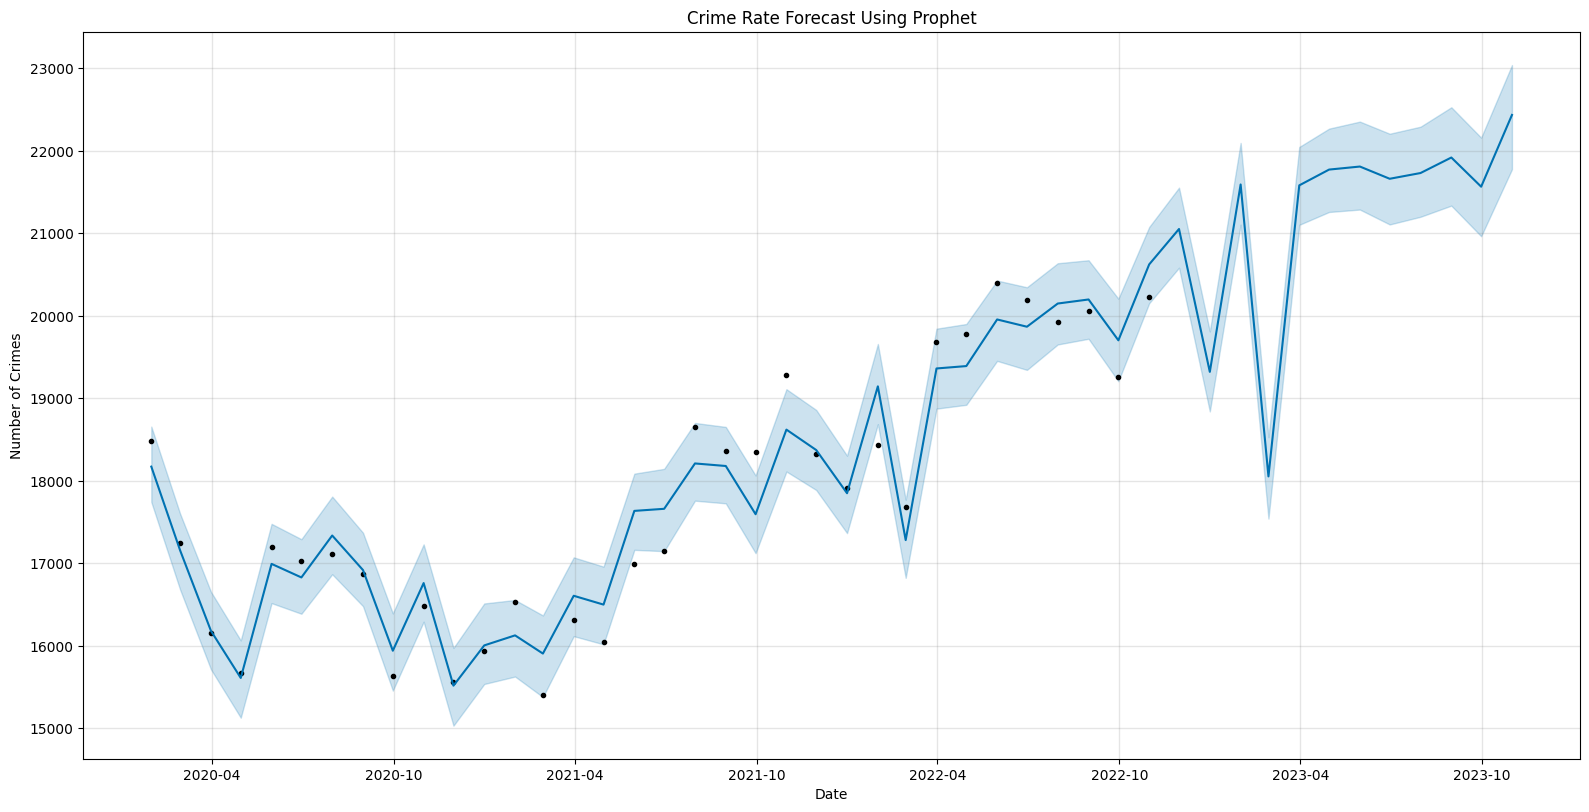

In [ ]:
# Prepare data for Prophet
prophet_data = monthly_crimes.reset_index()
prophet_data.columns = ['ds', 'y']

# Split data (excluding the last 12 months from training for visualization purposes)
train_prophet = prophet_data[:-12]

# Initialize and train the Prophet model
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
prophet_model.fit(train_prophet)

# Create a dataframe for future dates (next 12 months)
future = prophet_model.make_future_dataframe(periods=12, freq='M')

forecast_prophet = prophet_model.predict(future)

fig = prophet_model.plot(forecast_prophet, figsize=(16, 8))
plt.title('Crime Rate Forecast Using Prophet')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()